<a href="https://colab.research.google.com/github/osanabria24/MetNumUN2022I/blob/main/Lab13/group13MontecarloAreas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Integration

**Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

Let’s start with a simple integration problem in 1D,

$$\int_0^3 sin^2(x) dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

**integrate(x\*\*2)**

<img src="https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen1.png?raw=true" />

**integrate_{0}^{3}((sin(x))\*\*2)dx**


<img src="https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen2.png?raw=true" />



## Sympy symbolic integration
* integrate https://docs.sympy.org/latest/modules/integrals/integrals.html 
* Symbol https://docs.sympy.org/latest/modules/core.html#symbol
* cos https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* sin https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* pi https://docs.sympy.org/latest/modules/core.html#pi 
* Rational https://docs.sympy.org/latest/modules/core.html#rational 
* evaluate https://docs.sympy.org/latest/modules/evalf.html
* basic operations https://docs.sympy.org/latest/tutorial/basic_operations.html

In [ ]:
import sympy
from sympy import sin
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(sin(x)**2)
print(i)
result["analytical"] = float(i.subs(x, 3) - i.subs(x, 0))
print("Analytical result: {}".format(result["analytical"]))

x/2 - sin(x)*cos(x)/2
Analytical result: 1.5698538745497315



We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$  \int_I f(x) dx = \mathbb{E}_I(f(x)) \times volume(I)$$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.


<img src="https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen3.png?raw=true" />

Generate  $r_1,r_2,\cdots, r_N$ random uniform random points in $[0,3]$ and evaluate the fucntion $f(x)=sin^2(x)$ in ecah random point $f_i = sin^2(r_i)$, calculate the  experimental average of the value fo the fucnction
$$
\overline{f} = \frac{1}{N} \sum_{i=1}^{N} f_i \approx 0.591\cdots
$$  
The estimation of $\mathbb{E}_I(f(x))$ is $\overline{f} =0.591\cdots$ and $volume(I)=(3-0)$ therefore the estimation integral is 

$$
\int_0^3 sin^2(x) dx \approx volume(I) \times \overline{f} = (3-0) \times 0.591\cdots = 1.77201\cdots
$$ 

<img src="https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen4.png?raw=true" />


In [ ]:
import numpy
from numpy import sin
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += (sin(x))**2
volume = 3 - 0
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 1.7720122197958565


**integrate_{0}^{3}(3\*x\*\*2 * ln(x)\*\*4)dx**

> Indented block



<img src="https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen5.png?raw=true" />

In [ ]:
import sympy
x = sympy.Symbol("x")
i = sympy.integrate(3*x**2 * sympy.ln(x)**4)
print(i)
print(float(i.subs(x, 3) - i.subs(x, 0))) ## Como las funciones poseen un logaritmo, no es posible integrarlo en el punto 0
print(float(i.subs(x, 3) - i.subs(x, 0.0001)))

x**3*log(x)**4 - 4*x**3*log(x)**3/3 + 4*x**3*log(x)**2/3 - 8*x**3*log(x)/9 + 8*x**3/27
nan
16.68018152585555


In [ ]:
import numpy
from numpy import log
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(0, 3)
    accum += 3*x**2 * numpy.log(x)**4
volume = 3 - 0
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

# Monte Carlo Area Approximation



![MontecarloAreas.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/MontecarloAreas.png)

## Polar Curves - Brilliant

* https://brilliant.org/wiki/polar-curves/

![PolarCurvesBrilliant.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/PolarCurvesBrilliant.png)

### Area inside of polar curve - UT Calculus

* https://web.ma.utexas.edu/users/m408s/m408d/CurrentWeb/LM10-4-2.php

![IntPolarCurvesUTCalculus.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/IntPolarCurvesUTCalculus.png)


# Plotting and Calculating the Area with Wolfram Alpha 

## polar r=1−cos3θsin9θ, θ in[0,2pi]

![PolarCurvesWolfram.png](https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen6.png?raw=true)

## 1/2 int_0^{2pi} (1−cos3θsin9θ)^2 dθ 

![IntPolarCurvesWolfram.png](https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen7.png?raw=true)

##  area under 1/2 (1-cos 3t sin 9t)^ 2 for 0<t<2pi

![AreaUnderWolfram.png](https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen8.png?raw=true)



## 1/2 integral(1 - cos(3 θ) sin(9 θ))^2 dθ 




1/8 (5 θ + 1/6 sin(6 θ) - 1/24 sin(12 θ) - 1/18 sin(18 θ) - 1/48 sin(24 θ) + 2/3 cos(6 θ) + 1/3 cos(12 θ)) + constant

Replacing in (2π) = 2*pi 
1/8 (10 pi + 1/6 sin(12 pi) - 1/24 sin(24 pi) - 1/18 sin(36 pi) - 1/48 sin(48 pi) + 2/3 cos(12 pi) + 1/3 cos(24 pi))  = (5 π)/4 + 1/8  

Replacing in 0 
1/8 (5 (0) + 1/6 sin(0) - 1/24 sin(0) - 1/18 sin(0) - 1/48 sin(0) + 2/3 cos(0) + 1/3 cos(0)) = 1/8

Difference
(5 π)/4 = 3.92699

![AreaUnderWolfram1.png](https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen6.png?raw=true)
![AreaUnderWolfram1.png](https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen9.png?raw=true)
![AreaUnderWolfram1.png](https://github.com/jubedoyag/MetNumUN2021II/blob/main/Lab6/images/imagen10.png?raw=true)




**Now the area inside the polar curve** $r= 1- \cos(\theta) \sin(3\theta)$

In [ ]:
from sympy import integrate, Symbol, cos, sin, pi,  Rational

theta = Symbol('theta')
integrate((1- cos(3*theta)* sin(9*theta))**2)

theta*sin(3*theta)**2*sin(9*theta)**2/4 + theta*sin(3*theta)**2*cos(9*theta)**2/4 + theta*sin(9*theta)**2*cos(3*theta)**2/4 + theta*cos(3*theta)**2*cos(9*theta)**2/4 + theta + sin(3*theta)**2*sin(9*theta)*cos(9*theta)/288 + 7*sin(3*theta)*sin(9*theta)**2*cos(3*theta)/96 + sin(3*theta)*sin(9*theta)/12 + 3*sin(3*theta)*cos(3*theta)*cos(9*theta)**2/32 - 17*sin(9*theta)*cos(3*theta)**2*cos(9*theta)/288 + cos(3*theta)*cos(9*theta)/4

In [ ]:
Rational(1,2) * integrate((1- cos(3*theta)* sin(9*theta))**2)

theta*sin(3*theta)**2*sin(9*theta)**2/8 + theta*sin(3*theta)**2*cos(9*theta)**2/8 + theta*sin(9*theta)**2*cos(3*theta)**2/8 + theta*cos(3*theta)**2*cos(9*theta)**2/8 + theta/2 + sin(3*theta)**2*sin(9*theta)*cos(9*theta)/576 + 7*sin(3*theta)*sin(9*theta)**2*cos(3*theta)/192 + sin(3*theta)*sin(9*theta)/24 + 3*sin(3*theta)*cos(3*theta)*cos(9*theta)**2/64 - 17*sin(9*theta)*cos(3*theta)**2*cos(9*theta)/576 + cos(3*theta)*cos(9*theta)/8

In [ ]:
(Rational(1,2) * integrate((1- cos(3*theta)* sin(9*theta))**2)).subs(theta,2*pi)-(Rational(1,2) * integrate((1- cos(3*theta)* sin(9*theta))**2)).subs(theta,0)

5*pi/4

# Scipy numeric integration

* intregrate.quad https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [ ]:
import scipy.integrate as integrate
import math
result = integrate.quad(lambda theta: ((1/2)*(1- (math.cos(theta)* math.sin(3*theta)))**2), 0, 2*math.pi)
result

(3.9269908169872414, 1.0155038181886011e-10)

# Monte Carlo area approximation



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


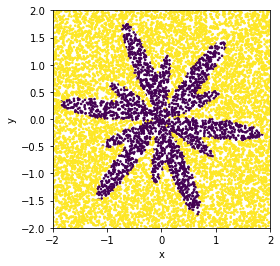

Area approx: 3.92


In [ ]:
import random 
import matplotlib.pyplot as plt
import math

n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(3*theta)* math.sin(9*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(n))*16)

In [ ]:
import random 
import matplotlib.pyplot as plt
import math

n=1000000
count = 0
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(3*theta)* math.sin(9*theta))):
    count = count +1
print("Area approx:",(count/float(n))*16)

Area approx: 3.91696


Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipedia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [ ]:
import matplotlib.pyplot as plt
import numpy 
import math

# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


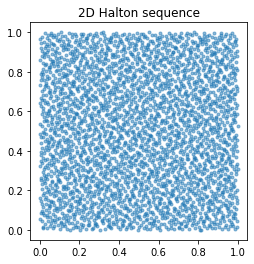

In [ ]:
N = 3000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Area approx: 3.9184


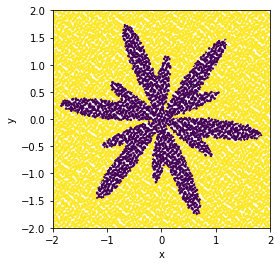

Area approx: 3.9184


In [ ]:
N = 10000
seq = halton(2, N)
count = 0
c=[]
xlist=[]
ylist=[]
clist=[]
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(3*theta)* math.sin(9*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
print("Area approx:",(count/float(N))*16)
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(N))*16)


In [ ]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(3*theta)* math.sin(9*theta))):
    count = count +1
print("Area approx:",(count/float(N))*16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Area approx: 3.92696


**A higher dimensional integral** [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 


Let us now analyze an integration problem in dimension 4, the Ishigami function. This is a well-known function in numerical optimization and stochastic analysis, because it is very highly non-linear.

In [ ]:
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1) + 7*sympy.sin(x2)**2 + 0.1 * x3**4 * sympy.sin(x1)
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 868.175747048395


In [ ]:
#ejemplo
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1**3) + 5*sympy.sin(2*x2)**2 + 1.5 * x3**2 * sympy.sin(x1-x2)**2
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 1232.1649031765594


In [ ]:
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 860.0679151084403


In [ ]:
#ejemplo

N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(xx1**3) + 5*numpy.sin(2*xx2)**2 + 1.5 * xx3**2 * numpy.sin(xx1-xx2)**2
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 1233.083896433811


In [ ]:
import math
import numpy
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


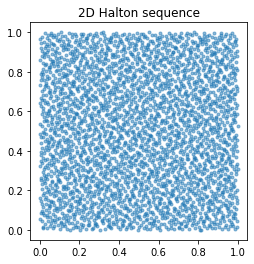

In [ ]:
import matplotlib.pyplot as plt
N = 3000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);

In [ ]:
N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))

Qausi Monte Carlo Halton Sequence result: 868.238928030592


In [ ]:
#ejemplo
N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1**3) + 5*numpy.sin(2*xx2)**2 + 1.5 * xx3**2 * numpy.sin(xx1-xx2)**2
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))

Qausi Monte Carlo Halton Sequence result: 1232.3312662528538
